In [1]:
import birdepy as bd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
t_data_b = [1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 2010,
          2011, 2012, 2013, 2014, 2015]
p_data_b = [30, 37, 35, 35, 42, 39, 50, 50, 57, 61, 86, 98, 94, 108, 117, 118]

In [3]:
est_v1 = bd.estimate(t_data_b, p_data_b, [2, 2, 0.05], [[0,10], [0,10], [0, 1]],
                    model='Verhulst',  known_p=[0], idx_known_p=[3], seed=2021)
(est_v1.p).insert(0, 'Verhulst 1')
# (est_v1.se).insert(0, 'Verhulst 1')
extra_v1 = ['Verhulst 1', est_v1.capacity[1], np.exp(est_v1.val)]

In [4]:
est_v2 = bd.estimate(t_data_b, p_data_b, [2, 2, 0.05], [[0,10], [0,10], [0, 1]],
                    model='Verhulst',  known_p=[0], idx_known_p=[2], se_type='asymptotic',
                    seed=2021)
(est_v2.p).insert(0, 'Verhulst 2')
# (est_v2.se).insert(0, 'Verhulst 2')
extra_v2 = ['Verhulst 2', est_v2.capacity[1], np.exp(est_v2.val)]

In [5]:
est_r = bd.estimate(t_data_b, p_data_b, [2, 2, 0.05], [[0,10], [0,10], [0,1]], 
                    model='Ricker', known_p=[1], idx_known_p=[3], se_type='asymptotic', 
                    seed=2021)
(est_r.p).insert(0, 'Ricker')
# (est_r.se).insert(0, 'Ricker')
extra_r = ['Ricker', est_r.capacity[1], np.exp(est_r.val)]

In [6]:
est_b = bd.estimate(t_data_b, p_data_b, [2, 2, 2], [[0,10], [0,10], [0,1]],
                      model='Hassell', known_p=[1], idx_known_p=[3], 
                      se_type='asymptotic',
                      seed=2021)
(est_b.p).insert(0, 'Beverton-Holt')
# (est_b.se).insert(0, 'Beverton-Holt')
extra_b = ['Beverton-Holt', est_b.capacity[1], np.exp(est_b.val)]

C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\birdepy\interface_estimate.py:530: RuntimeWarning: invalid value encountered in sqrt
  se = list(np.sqrt(np.diag(cov)))


In [7]:
est_h = bd.estimate(t_data_b, p_data_b, [2, 2, 2], [[0,10], [0,10], [0, 1]],
                      model='Hassell', known_p=[2], idx_known_p=[3], 
                      se_type='asymptotic',
                      seed=2021)
(est_h.p).insert(0, 'Hassell')
# (est_h.se).insert(0, 'Hassell')
extra_h = ['Hassell', est_h.capacity[1], np.exp(est_h.val)]

In [8]:
est_mss = bd.estimate(t_data_b, p_data_b, [2, 2, 2], [[0,10], [0,10], [0, 1]], 
                      model='MS-S', known_p=[2], idx_known_p=[3], 
                      se_type='asymptotic',
                      seed=2021)
(est_mss.p).insert(0, 'MS-S')
# (est_mss.se).insert(0, 'MS-S')
extra_mss = ['MS-S', est_mss.capacity[1], np.exp(est_mss.val)]

In [9]:
est_l = bd.estimate(t_data_b, p_data_b, [2]*2, [[0,10]]*2, model='linear', 
                    se_type='asymptotic',
                    seed=2021)
(est_l.p).insert(0, 'linear')
# (est_l.se).insert(0, 'linear')
extra_l = ['linear', 'n/a', np.exp(est_l.val)]

In [10]:
est_mss

      message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
      success: True
   iterations: Not applicable for `dnm`. 
            p: ['MS-S', 0.3283136317004268, 0.24126610944167814, 0.0045452949274881]
     capacity: [ 0.000e+00  1.330e+02]
          val: -48.43006879874378
          cov: [[ 1.417e-02  1.115e-02  7.868e-05]
                [ 1.115e-02  1.037e-02 -2.992e-05]
                [ 7.868e-05 -2.992e-05  6.836e-06]]
           se: [0.11904627855323659, 0.1018574494944716, 0.002614661476416732]
 compute_time: 422.1865928173065
    framework: dnm
       method: Not applicable for `dnm`. 
           p0: [2, 2, 2]
       scheme: discrete
      samples: Not applicable for `dnm`. 
        model: MS-S

In [11]:
print("\n Table: BLACK ROBIN DATASET PARAMETER ESTIMATES")
print(pd.DataFrame([est_v1.p, est_v2.p, est_r.p, est_b.p,
                    est_h.p, est_mss.p, est_l.p], 
                  columns=["Model", "gamma", "nu", "alpha/beta"]))


 Table: BLACK ROBIN DATASET PARAMETER ESTIMATES
           Model     gamma        nu  alpha/beta
0     Verhulst 1  2.000000  0.034955    0.050000
1     Verhulst 2  0.301800  0.186001    0.004622
2         Ricker  0.358749  0.237974    0.002907
3  Beverton-Holt  1.092836  0.098725    0.090737
4        Hassell  0.363365  0.237340    0.001657
5           MS-S  0.328314  0.241266    0.004545
6         linear  0.284487  0.234976         NaN


In [12]:
# print("Table: BLACK ROBIN DATASET STANDARD ERRORS")
# print(pd.DataFrame([est_v1.se, est_v2.se, est_r.se, est_b.se, 
#                     est_h.se, est_mss.se, est_l.se],
#                   columns=["Model", "gamma", "nu", "alpha/beta"]))

In [13]:
print("Table: BLACK ROBIN DATASET CARRYING CAPACITY AND LIKELIHOOD")
print(pd.DataFrame([extra_v1, extra_v2, extra_r, extra_b,
                    extra_h, extra_mss, extra_l], 
                  columns=["Model", "Capacity", "Likelihood"]))

Table: BLACK ROBIN DATASET CARRYING CAPACITY AND LIKELIHOOD
           Model Capacity    Likelihood
0     Verhulst 1     20.0  0.000000e+00
1     Verhulst 2    135.0  9.571204e-22
2         Ricker    142.0  9.990866e-22
3  Beverton-Holt    111.0  5.994111e-24
4        Hassell    144.0  1.007454e-21
5           MS-S    133.0  9.270184e-22
6         linear      n/a  5.587250e-22


C:\Users\brend\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\birdepy\interface_forecast.py:19: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  param_prop = rng.multivariate_normal(param, cov)


0

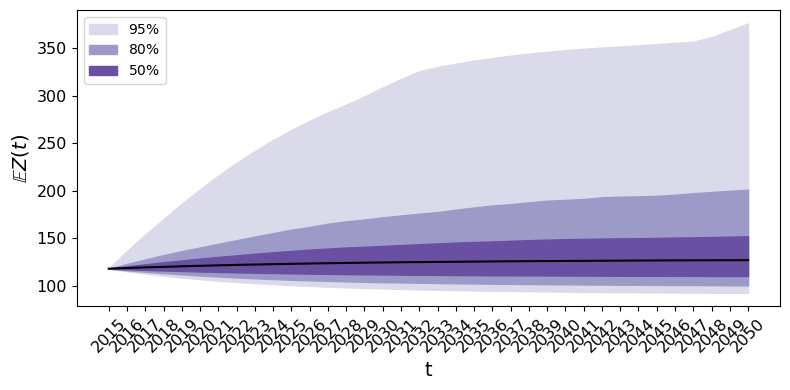

In [14]:
bd.forecast('Hassell', p_data_b[-1], np.arange(2015, 2051, 1), est_b.p[1:], cov=est_b.cov, p_bounds=[[0,10], [0,10], [0, 1]], 
            known_p=[1], idx_known_p=[3])

      message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
      success: True
   iterations: Not applicable for `dnm`. 
            p: [0.369716216006405, 0.0038375009206314324]
     capacity: [ 0.000e+00  1.460e+02]
          val: -48.3380048931217
          cov: [[ 9.576e-03  4.236e-04]
                [ 4.236e-04  1.974e-05]]
           se: [0.09785623961960951, 0.0044424884884227325]
 compute_time: 47.56699776649475
    framework: dnm
       method: Not applicable for `dnm`. 
           p0: [0.36, 0.0017]
       scheme: discrete
      samples: Not applicable for `dnm`. 
        model: Hassell

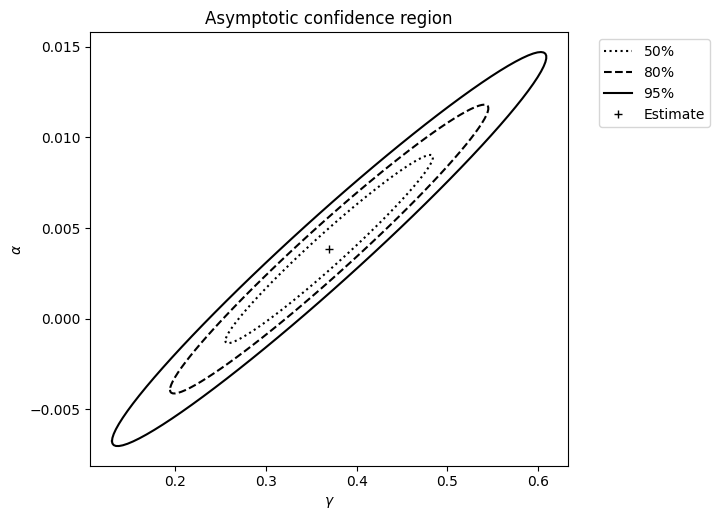

In [15]:
bd.estimate(t_data_b, p_data_b, [0.36, 0.0017], [[0,1], [0, 1]],
            model='Hassell', known_p=[0.2373, 1], idx_known_p=[1, 3], 
            se_type='asymptotic', ci_plot=True, seed=2021,
            xlabel='$\gamma$', ylabel='$\\alpha$')

      message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
      success: True
   iterations: Not applicable for `dnm`. 
            p: [0.369716216006405, 0.0038375009206314324]
     capacity: [ 0.000e+00  1.460e+02]
          val: -48.3380048931217
          cov: [[ 1.175e-02  5.000e-04]
                [ 5.000e-04  2.259e-05]]
           se: [0.10839019035087016, 0.00475298590956418]
 compute_time: 6549.395225524902
    framework: dnm
       method: Not applicable for `dnm`. 
           p0: [0.36, 0.0017]
       scheme: discrete
      samples: Not applicable for `dnm`. 
        model: Hassell

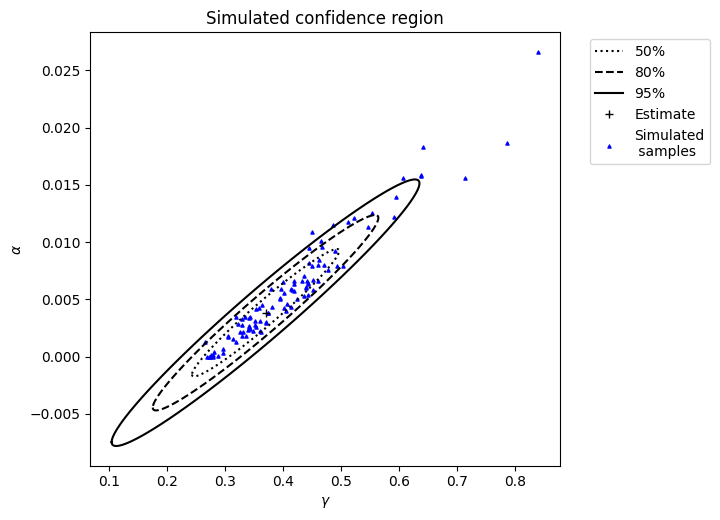

In [16]:
bd.estimate(t_data_b, p_data_b, [0.36, 0.0017], [[0,10], [0, 1]],
            model='Hassell', known_p=[0.2373, 1], idx_known_p=[1, 3], 
            se_type='simulated', ci_plot=True, seed=2021,
            xlabel='$\gamma$', ylabel='$\\alpha$')

In [17]:
t_data_w = [t for t in range(1938, 2010, 1)]
p_data_w = [9, 11, 13, 8, 10, 10, 9, 11, 13, 15, 15, 17, 15, 12, 10, 12, 11, 14, 12, 13, 16,
          17, 18, 19, 16, 16, 21, 22, 22, 24, 25, 28, 28, 30, 25, 25, 24, 29, 34, 36, 37,
          38, 39, 37, 36, 38, 43, 48, 55,  67, 69, 73, 73, 66, 68, 71, 66, 79, 80, 91,
          91, 94, 90, 88, 93, 97, 109, 110, 118, 133, 135, 132]

Text(0.5, 1.0, 'Black Robins')

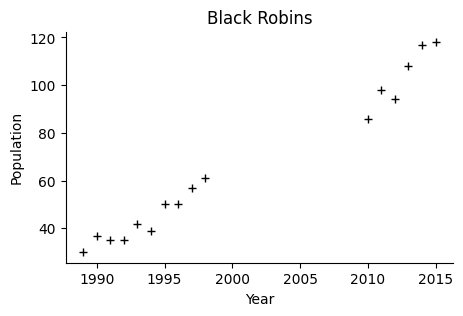

In [18]:
fig, axs = plt.subplots(1,1, figsize=(5,3))
axs.plot(t_data_b, p_data_b, 'k+')
axs.set(xlabel='Year')
axs.set(ylabel='Population')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_title('Black Robins')

Text(0.5, 1.0, 'Whooping Cranes')

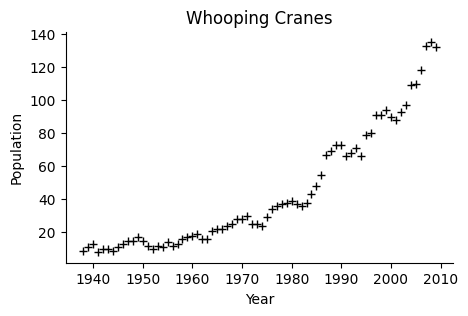

In [19]:
fig, axs = plt.subplots(1,1, figsize=(5,3))
axs.plot(t_data_w, p_data_w, 'k+')
axs.set(xlabel='Year')
axs.set(ylabel='Population')
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_title('Whooping Cranes')

In [20]:
est_v1 = bd.estimate(t_data_w, p_data_w, [2, 2, 0.05], [[0,10], [0,10], [0, 1]],
                    model='Verhulst',  known_p=[0], idx_known_p=[3], se_type='asymptotic',
                    seed=2021)
(est_v1.p).insert(0, 'Verhulst 1')
# (est_v1.se).insert(0, 'Verhulst 1')
extra_v1 = ['Verhulst 1', est_v1.capacity[1], np.exp(est_v1.val)]

In [21]:
est_v2 = bd.estimate(t_data_w, p_data_w, [2, 2, 0.05], [[0,10], [0,10], [0, 1]],
                    model='Verhulst',  known_p=[0], idx_known_p=[2], se_type='asymptotic',
                    seed=2021)
(est_v2.p).insert(0, 'Verhulst 2')
# (est_v2.se).insert(0, 'Verhulst 2')
extra_v2 = ['Verhulst 2', est_v2.capacity[1], np.exp(est_v2.val)]

In [22]:
est_r = bd.estimate(t_data_w, p_data_w, [2, 2, 0.05], [[0,10], [0,10], [0,1]], 
                    model='Ricker', known_p=[1], idx_known_p=[3], se_type='asymptotic', 
                    seed=2021)
(est_r.p).insert(0, 'Ricker')
# (est_r.se).insert(0, 'Ricker')
extra_r = ['Ricker', est_r.capacity[1], np.exp(est_r.val)]

In [23]:
est_b = bd.estimate(t_data_w, p_data_w, [2, 2, 2], [[0,10], [0,10], [0, 1]],
                      model='Hassell', known_p=[1], idx_known_p=[3], 
                      se_type='asymptotic',
                      seed=2021)
(est_b.p).insert(0, 'Beverton-Holt')
# (est_b.se).insert(0, 'Beverton-Holt')
extra_b = ['Beverton-Holt', est_b.capacity[1], np.exp(est_b.val)]

In [24]:
est_h = bd.estimate(t_data_w, p_data_w, [2, 2, 2], [[0,10], [0,10], [0, 1]],
                      model='Hassell', known_p=[2], idx_known_p=[3], 
                      se_type='asymptotic',
                      seed=2021)
(est_h.p).insert(0, 'Hassell')
# (est_h.se).insert(0, 'Hassell')
extra_h = ['Hassell', est_h.capacity[1], np.exp(est_h.val)]

In [25]:
est_mss = bd.estimate(t_data_w, p_data_w, [2, 2, 2], [[0,10], [0,10], [0, 1]], 
                      model='MS-S', known_p=[2], idx_known_p=[3], 
                      se_type='asymptotic',
                      seed=2021)
(est_mss.p).insert(0, 'MS-S')
# (est_mss.se).insert(0, 'MS-S')
extra_mss = ['MS-S', est_mss.capacity[1], np.exp(est_mss.val)]

In [26]:
est_l = bd.estimate(t_data_w, p_data_w, [2]*2, [[0,10]]*2, model='linear', 
                    se_type='asymptotic',
                    seed=2021)
(est_l.p).insert(0, 'linear')
# (est_l.se).insert(0, 'linear')
extra_l = ['linear', 'n/a', np.exp(est_l.val)]

In [27]:
est_lm = bd.estimate(t_data_w, p_data_w, [2]*3, [[0,10]]*3, model='linear-migration', 
                      se_type='asymptotic',
                      seed=2021)
(est_lm.p).insert(0, 'linear-migration')
# (est_lm.se).insert(0, 'linear-migration')
extra_lm = ['linear-migration', 'n/a', np.exp(est_lm.val)]

In [28]:
print("\n Table: WHOOPING CRANE PARAMETER ESTIMATES")
print(pd.DataFrame([est_v1.p, est_v2.p, est_r.p, est_b.p, 
                    est_h.p, est_mss.p, est_l.p, est_lm.p],
                  columns=["Model", "gamma", "nu", "alpha/beta"]))


 Table: WHOOPING CRANE PARAMETER ESTIMATES
              Model     gamma        nu  alpha/beta
0        Verhulst 1  0.199826  0.149246    0.000767
1        Verhulst 2  0.193123  0.142325    0.001098
2            Ricker  0.199855  0.149269    0.000796
3     Beverton-Holt  0.199895  0.149289    0.000826
4           Hassell  0.199876  0.149279    0.000405
5              MS-S  0.196566  0.149350    0.002520
6            linear  0.190219  0.150645         NaN
7  linear-migration  0.181219  0.148857    0.315667


In [29]:
# print("Table: WHOOPING CRANE STANDARD ERRORS")
# print(pd.DataFrame([est_v1.se, est_v2.se, est_r.se, est_b.se, 
#                     est_h.se, est_mss.se, est_l.se, est_lm.se],
#                     columns=["Model", "gamma", "nu", "alpha/beta"]))

In [30]:
print("Table: WHOOPING CRANE CARRYING CAPACITY AND LIKELIHOOD")
print(pd.DataFrame([extra_v1, extra_v2, extra_r, extra_b, extra_h,
                    extra_mss, extra_l, extra_lm],
                  columns=["Model", "Capacity", "Likelihood"]))

Table: WHOOPING CRANE CARRYING CAPACITY AND LIKELIHOOD
              Model Capacity    Likelihood
0        Verhulst 1    330.0  1.509764e-81
1        Verhulst 2    325.0  1.524110e-81
2            Ricker    367.0  1.505298e-81
3     Beverton-Holt    411.0  1.501209e-81
4           Hassell    388.0  1.503209e-81
5              MS-S    224.0  1.563072e-81
6            linear      n/a  1.296968e-81
7  linear-migration      n/a  1.628435e-81


      message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
      success: True
   iterations: Not applicable for `dnm`. 
            p: [0.18124670701630796, 0.1488859371822735]
     capacity: [-9.000e+00]
          val: -186.02177333719942
          cov: [[ 8.755e-04  8.148e-04]
                [ 8.148e-04  8.626e-04]]
           se: [0.02958938059381054, 0.02937004397187775]
 compute_time: 15.233999967575073
    framework: dnm
       method: Not applicable for `dnm`. 
           p0: [0.1812, 0.1489]
       scheme: discrete
      samples: Not applicable for `dnm`. 
        model: linear-migration

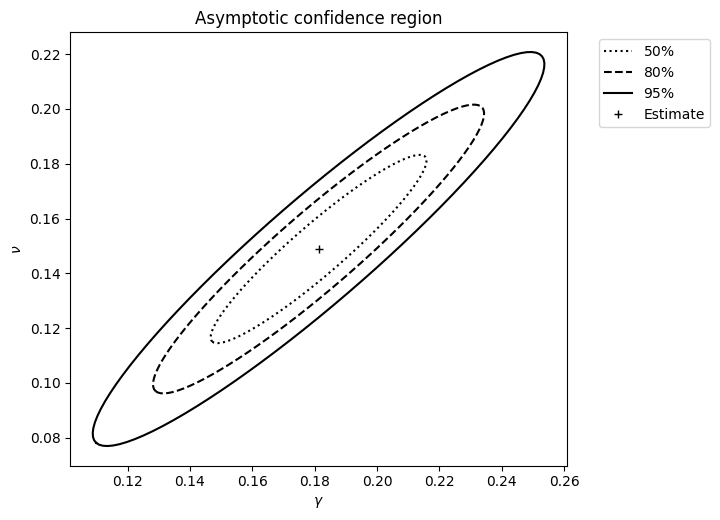

In [31]:
bd.estimate(t_data_w, p_data_w, [0.1812, 0.1489], [[0,1], [0, 1]],
            model='linear-migration', known_p=[0.3157], idx_known_p=[2], 
            se_type='asymptotic', ci_plot=True, seed=2021,
            xlabel='$\gamma$', ylabel='$\\nu$')

      message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
      success: True
   iterations: Not applicable for `dnm`. 
            p: [0.18124670701630796, 0.1488859371822735]
     capacity: [-9.000e+00]
          val: -186.02177333719942
          cov: [[ 8.023e-04  7.413e-04]
                [ 7.413e-04  7.781e-04]]
           se: [0.02832407904829466, 0.02789410773882928]
 compute_time: 1922.1759951114655
    framework: dnm
       method: Not applicable for `dnm`. 
           p0: [0.1812, 0.1489]
       scheme: discrete
      samples: Not applicable for `dnm`. 
        model: linear-migration

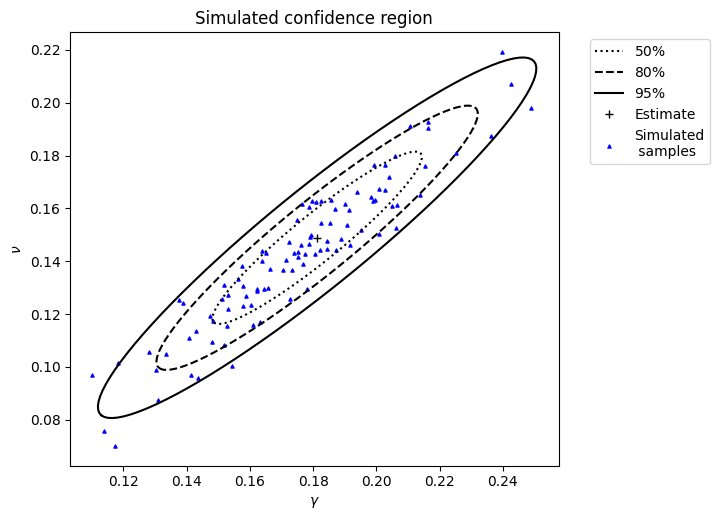

In [32]:
bd.estimate(t_data_w, p_data_w, [0.1812, 0.1489], [[0,1], [0, 1]],
            model='linear-migration', known_p=[0.3157], idx_known_p=[2], 
            se_type='simulated', ci_plot=True, seed=2021,
            xlabel='$\gamma$', ylabel='$\\nu$')

0

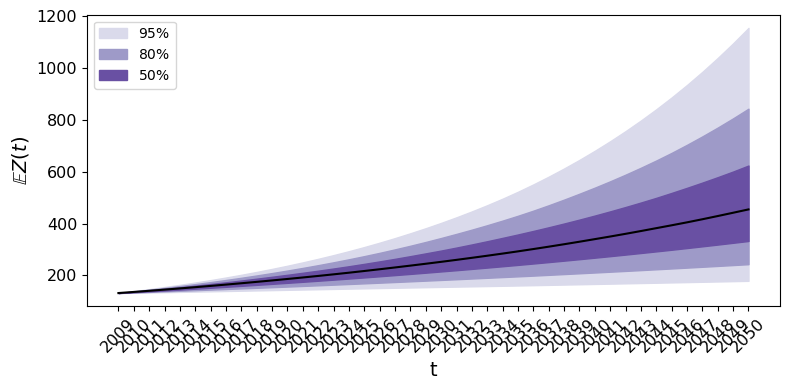

In [33]:
bd.forecast('linear-migration', p_data_w[-1], np.arange(2009, 2051, 1), est_lm.p[1:], 
            cov=est_lm.cov, p_bounds=[[0,10]]*3)

0

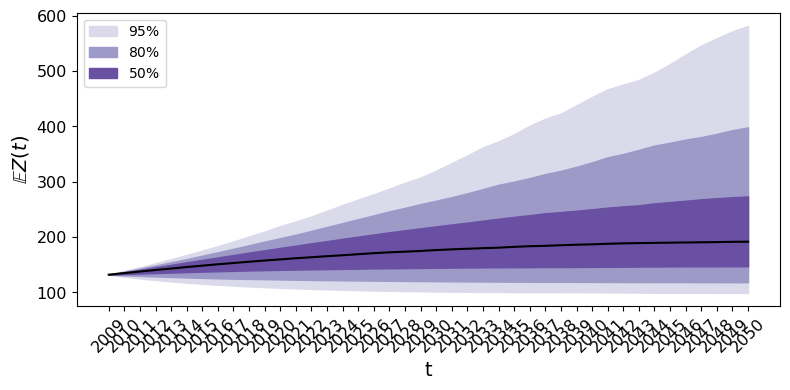

In [34]:
bd.forecast('MS-S', p_data_w[-1], np.arange(2009, 2051, 1), est_mss.p[1:], 
            cov=est_mss.cov, p_bounds=[[0,10]]*3, known_p=[2], idx_known_p=[3])